In [ ]:
import pandas as pd

In [ ]:
#membaca file dataset
df=pd.read_csv('/content/drive/MyDrive/mp 1/heart_disease_cleaned.csv')
df



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.00,233.0,True,lv hypertrophy,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.00,286.0,False,lv hypertrophy,108.00,True,1.500,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.00,229.0,False,lv hypertrophy,129.00,True,2.600,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.00,250.0,False,normal,187.00,False,3.500,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.00,204.0,False,lv hypertrophy,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,916,54,Female,VA Long Beach,asymptomatic,127.00,333.0,True,st-t abnormality,154.00,False,0.000,flat,0.0,normal,1
915,917,62,Male,VA Long Beach,typical angina,143.06,139.0,False,st-t abnormality,119.94,True,2.042,flat,0.0,reversable defect,0
916,918,55,Male,VA Long Beach,asymptomatic,122.00,223.0,True,st-t abnormality,100.00,False,0.000,flat,1.0,fixed defect,2
917,919,58,Male,VA Long Beach,asymptomatic,150.81,385.0,True,lv hypertrophy,110.63,True,2.181,flat,0.0,reversable defect,0


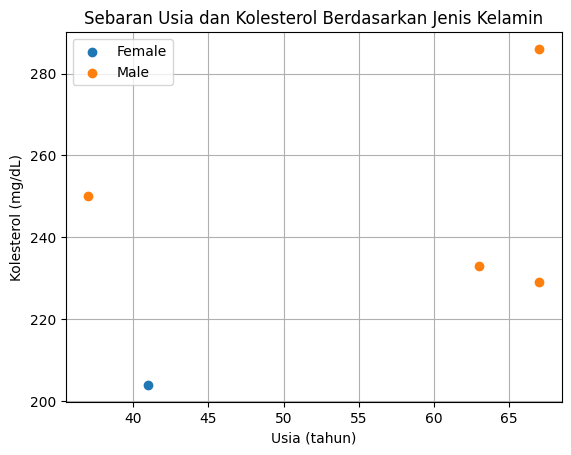

In [ ]:
#visualisasi data

import matplotlib.pyplot as plt


ig, ax = plt.subplots()
for sex, d in df.head().groupby('sex'):
    ax.scatter(d['age'], d['chol'], label=sex)


plt.legend(loc='upper left')
plt.title('Sebaran Usia dan Kolesterol Berdasarkan Jenis Kelamin')
plt.xlabel('Usia (tahun)')
plt.ylabel('Kolesterol (mg/dL)')
plt.grid(True)
plt.show()

In [ ]:
#preprocesing data

import numpy as np

x_train = np.array(df.head() [['age', 'chol']])
y_train = np.array(df.head() ['sex'])

print(f'x_train:\n{x_train}\n')
print(f'y_train:{y_train}')


x_train:
[[ 63. 233.]
 [ 67. 286.]
 [ 67. 229.]
 [ 37. 250.]
 [ 41. 204.]]

y_train:['Male' 'Male' 'Male' 'Male' 'Female']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [1]
 [1]
 [1]
 [0]]


In [ ]:
y_train = y_train.flatten()
print(f'y_train:\n{y_train}')

y_train:
[1 1 1 1 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
age = 63
chol = 233.0
x_new = np.array([age,chol]).reshape(1, -1)
x_new

array([[ 63., 233.]])

In [ ]:
y_new = model.predict(x_new)
y_new

array([1])

In [ ]:
lb.inverse_transform(x_new)

array(['Male'], dtype='<U6')

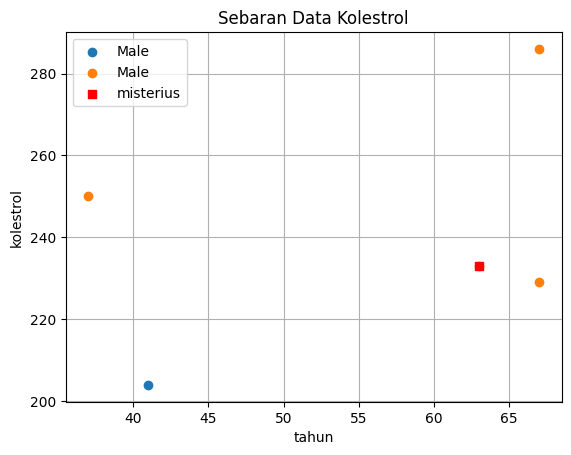

In [ ]:
fig, ax = plt.subplots()
for Gender, d in df.head().groupby('sex'):
  ax.scatter(d['age'],d['chol'], label=sex)

plt.scatter(age,
            chol,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Kolestrol')
plt.xlabel('tahun')
plt.ylabel('kolestrol')
plt.grid(True)
plt.show()

In [ ]:
misterius = np.array([age, chol])
misterius

array([ 63., 233.])

In [ ]:
x_train

array([[ 63., 233.],
       [ 67., 286.],
       [ 67., 229.],
       [ 37., 250.],
       [ 41., 204.]])

In [ ]:
y_train

array([1, 1, 1, 1, 0])

In [ ]:
from scipy.spatial.distance import euclidean

chol = [euclidean(misterius, d) for d in x_train]
chol

[0.0,
 53.150729063673246,
 5.656854249492381,
 31.064449134018133,
 36.40054944640259]

In [ ]:
if 'chol' not in df.columns:
    data_chol = [200, 180, 190, 210, 220]
    df['chol'] = data_chol


sorted_df = df.sort_values(by=['chol'])


print(sorted_df)

      id  age     sex      dataset              cp  trestbps   chol    fbs  \
617  618   47    Male  Switzerland     non-anginal     110.0    0.0  False   
689  690   62  Female  Switzerland  typical angina     140.0    0.0  False   
690  691   62  Female  Switzerland    asymptomatic     120.0    0.0  False   
691  692   62    Male  Switzerland  typical angina     120.0    0.0  False   
692  693   62    Male  Switzerland     non-anginal     160.0    0.0  False   
..   ...  ...     ...          ...             ...       ...    ...    ...   
584  585   44    Male      Hungary    asymptomatic     135.0  491.0  False   
568  569   53    Male      Hungary     non-anginal     145.0  518.0  False   
528  529   32    Male      Hungary    asymptomatic     118.0  529.0  False   
152  153   67  Female    Cleveland     non-anginal     115.0  564.0  False   
546  547   54    Male      Hungary    asymptomatic     130.0  603.0   True   

              restecg  thalch  exang  oldpeak        slope   ca

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

X_test = np.array([[233.0, 63], [333.0, 54], [139.0, 62], [204.0, 41]])

lb = LabelBinarizer()

lb.fit(['male', 'female'])
y_test = lb.transform(np.array(['male', 'male', 'female', 'female'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')


X_test:
[[233.  63.]
 [333.  54.]
 [139.  62.]
 [204.  41.]]

y_test:
[1 1 0 0]



In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 1.0


In [ ]:
from sklearn.metrics import precision_score


prec = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {prec}")

Precision: 1.0


In [ ]:
from sklearn.metrics import recall_score
rec =  recall_score(y_test, y_pred, average='macro')
print(f'Recall: {rec}')

Recall: 1.0


In [ ]:
from sklearn.metrics import f1_score
f1 =  f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1}')

F1-score: 1.0


In [ ]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef (y_test, y_pred)
print(f'MCC:{mcc}')

MCC:1.0
